In [145]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import linear_model, metrics

In [146]:
data= pd.read_csv('BigMac-NetHourlyWage.csv')
data


,Country,Big Mac Price ($),Net Hourly Wage ($)
0,Argentina,1.78,3.3
1,Australia,3.84,14.0
2,Brazil,4.91,4.3
3,Britain,3.48,13.9
4,Canada,4.00,12.8
5,Chile,3.34,3.1
6,China,1.95,3.0
7,Czech Republic,3.43,5.1
8,Denmark,4.90,17.7
9,Hungary,3.33,3.0


In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              27 non-null     object 
 1   Big Mac Price ($)    27 non-null     float64
 2   Net Hourly Wage ($)  27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 776.0+ bytes


In [148]:
data.describe()

,Big Mac Price ($),Net Hourly Wage ($)
count,27.000000,27.000000
mean,3.348889,7.725926
std,1.198093,5.927225
min,1.780000,1.300000
25%,2.475000,3.100000
50%,3.330000,5.100000
75%,3.785000,13.150000
max,6.560000,22.600000


In [149]:
data.drop(axis=1,columns='Country',inplace=True)

In [150]:
data

,Big Mac Price ($),Net Hourly Wage ($)
0,1.78,3.3
1,3.84,14.0
2,4.91,4.3
3,3.48,13.9
4,4.00,12.8
5,3.34,3.1
6,1.95,3.0
7,3.43,5.1
8,4.90,17.7
9,3.33,3.0


In [151]:
data.isnull().sum()

Big Mac Price ($)      0
Net Hourly Wage ($)    0
dtype: int64

In [152]:
data.rename(columns={'Big Mac Price ($)':'Big_Mac_Price', 'Net Hourly Wage ($)':'Net_Hourly_Wage'}, inplace=True)

<AxesSubplot:xlabel='Big_Mac_Price'>

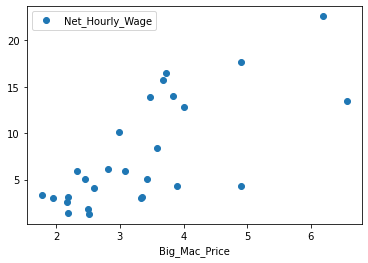

In [153]:
data.plot(x='Big_Mac_Price', y='Net_Hourly_Wage', style='o')

In [154]:
X = data.iloc[:,:-1]
Y= data.iloc[:,-1:]

In [155]:
Y

,Net_Hourly_Wage
0,3.3
1,14.0
2,4.3
3,13.9
4,12.8
5,3.1
6,3.0
7,5.1
8,17.7
9,3.0


In [156]:
X_train , X_test,Y_train, Y_test = train_test_split(X,Y,random_state=100,test_size=0.3)

In [157]:
X_test

,Big_Mac_Price
9,3.33
23,2.17
21,6.56
12,2.19
5,3.34
11,3.67
25,2.99
22,6.19
6,1.95


In [158]:
model = linear_model.LinearRegression()

In [159]:
model

LinearRegression()

In [160]:
model = model.fit(X_train ,Y_train)

In [161]:
model

LinearRegression()

In [162]:
Y_pred = model.predict(X_test)

In [163]:
y_pred =pd.DataFrame(Y_pred)

In [164]:
y_pred

,0
0,7.720589
1,3.426399
2,19.677688
3,3.500437
4,7.757608
5,8.979231
6,6.461947
7,18.307989
8,2.611984


In [165]:
y_pred.rename(columns={0:'Net_Hourly_Wage'},inplace=True)

In [166]:
y_pred

,Net_Hourly_Wage
0,7.720589
1,3.426399
2,19.677688
3,3.500437
4,7.757608
5,8.979231
6,6.461947
7,18.307989
8,2.611984


In [167]:
print("Slope of Regression Line: ", model.coef_)
print("Intercept of Regression Line: ", model.intercept_)

Slope of Regression Line:  [[3.70188813]]
Intercept of Regression Line:  [-4.60669824]


In [107]:
target_Variable = Y_test
target_Variable['Y_pred'] = Y_pred
target_Variable

<ipython-input-107-ba2540562043>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_Variable['Y_pred'] = Y_pred


,Net_Hourly_Wage,Y_pred
8,17.7,13.973719
13,1.8,4.333174
9,3.0,7.667196
21,13.5,20.641764
0,3.3,1.441010
11,15.7,9.032940
16,4.1,4.734863
17,5.9,3.650302
12,3.1,3.087937


In [168]:
Y_test.size

9

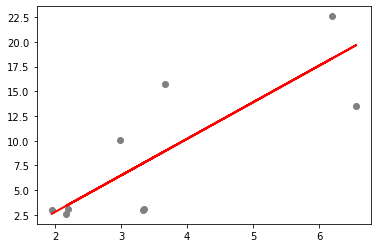

In [169]:
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.show()

In [170]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 3.53572996108736
Mean Squared Error: 17.77338470877092
Root Mean Squared Error: 4.215849227471367


# Linear Regression using statsmodel

In [171]:
import statsmodels.api as sm

In [172]:
# X_train = sm.add_constant(X_train)
linear_model = sm.OLS(Y_train, X_train).fit()

In [173]:
print(linear_model.summary())

                                 OLS Regression Results                                
Dep. Variable:        Net_Hourly_Wage   R-squared (uncentered):                   0.784
Model:                            OLS   Adj. R-squared (uncentered):              0.771
Method:                 Least Squares   F-statistic:                              61.70
Date:                Sun, 01 Aug 2021   Prob (F-statistic):                    4.68e-07
Time:                        01:26:11   Log-Likelihood:                         -51.184
No. Observations:                  18   AIC:                                      104.4
Df Residuals:                      17   BIC:                                      105.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

C:\Users\karthek.chakravarthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
